코드에 도움 주신 분: 천세진교수님

제목 : 관심있는 옷을 관리하는 프로그램을 만들려고 합니다.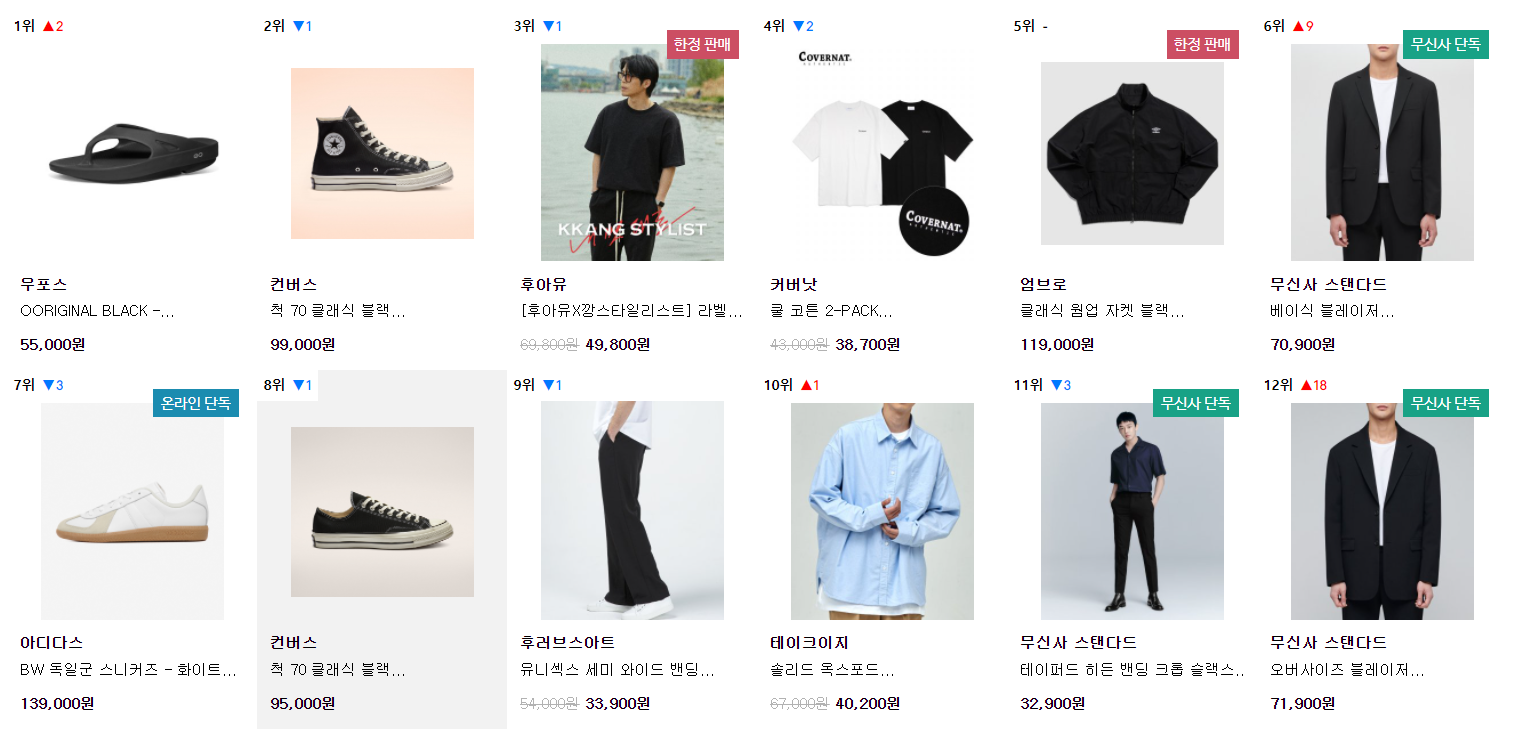

In [1]:
class Interested_product:
      def __init__(self,brand,kind,price,link,gender):
        self.brand=brand
        self.kind=kind
        self.price=price #won
        self.link=link
        self.gender=gender
        self.next=None

      def __repr__(self):
        return f"product [brand: {self.brand}, kind:{self.kind}, price:{self.price},gender:{self.gender} ]"

In [2]:
class BMS:
    def __init__(self,db_size):
        self.db_size = db_size
        self.generate_db() #데이터베이스 생성
        self.cursor_user_db = 0 # 사용자 DB에 대한 커서
        self.cursor_item_db = None # 아이템 DB에 대한 커서


    def generate_db(self):
        self.item = ItemDB(self.db_size[0]) #링크드리스트
        self.user = UserDB(self.db_size[1]) # 2D배열

    """
    T: O(N) - Linear time
    search : Keyword를 검색하는 함수로써 Itemdb에서 검색할 때는 링크드 리스토로 되어있기 때문에 curNode를 생성하여 검색하고, userdb는 리스트로 되어있어서 반복문을 통해 검색한다. 
    """ 
    def search(self, keyword):
        result = []
        
        curNode = self.item.pHead
        while curNode != None:
            if curNode.kind == keyword:
                result.append(curNode)
            curNode = curNode.next
        for i in range(len(self.user.data)):
            if self.user.data[i][0]==keyword:
                result.append(self.user.data[i])
        return result
    
    """
    T: O(N^2) - Linear time
    sort : 버블sort로써 sort함수를 부를 때 인자로 asc를 넣으면 오름차순으로 버블정렬을 한다. 만약 인자로 아무것도 넣지 않으면 내림차순으로 버블정렬한다.
    """  
    def sort(self, order_by='asc'):
        N = len(self.user.data)-1
        for i in range(N):
            for j in range(N-i-1):
                if order_by=='asc': # 오름차순
                    if self.user.data[j][1]>self.user.data[j+1][1]:
                        temp = self.user.data[j]
                        self.user.data[j]=self.user.data[j+1]
                        self.user.data[j+1]=temp
                else:
                    if self.user.data[j][1] < self.user.data[j+1][1]:
                        tmp = self.users.data[j]
                        self.users.data[j] = self.users.data[j+1]
                        self.users.data[j + 1] = tmp
    """
    T: O(N) - Linear time
    delete : 원하는 값을 찾아서 삭제하는 함수
    """  
    def delete(self,keyword):
        deleted = list()

        #item DB delet
        curNode = self.item.pHead
        prevNode = None
        while curNode != None:
            if curNode.kind == keyword:
                self.item.size -=1
                if curNode == self.item.pHead:
                    self.item.pHead = curNode.next
                else:
                    prevNode.next = curNode.next
            prevNode = curNode
            curNode = curNode.next
        
        exixting_list = list()
        for user in self.user.data:
            if user[0] != keyword:
                exixting_list.append(user)
            else:
                deleted.append(user)
                self.user.size-=1
        self.user.data = exixting_list

        return len(deleted)
   
    def print_item_db(self, limit):  
      i = 0 
      p = limit
      curNode = self.item.pHead
      while i < p and curNode is not None:
        print(curNode)
        i += 1
        curNode = curNode.next
        
   
    def print_user_db(self, limit):
        for i in range(limit):
            print(self.user.data[i])
    
    def get_user(self,num):
      cursor_user_db=0
      start=cursor_user_db
      end=start+num
      result=self.user.data[start:end]
      return result

    def get_item(self, nums):
      results, i = [], 0
      
      # 아이템 DB의 커서 세팅
      if self.cursor_item_db is None: 
        CurNode = self.item.pHead
      else:
        CurNode = self.cursor_item_db 

      while i < nums and CurNode is not None:
        results.append(CurNode)
        i+=1
        CurNode = CurNode.next

      self.cursor_item_db = CurNode

      return results      

    
!pip install names
import names
import random
import string

# 링크드 리스트 기반 아이템 데이터베이스
class ItemDB:
    def __init__(self,nums):
        self.pHead = None
        self.pTail = None
        self.next = next
        self.size = 0
        self.nums = nums
        self.generate_db()
        self.next=None

    #아이템 db생성
    def generate_db(self):
        all_kind=["Shoes","Pants",'outer',"Jacket"]
        for i in range(self.nums):
            brand = ''.join(random.choice(string.ascii_lowercase)for i in range(5))
            kind= "".join(random.choice(all_kind))
            price= random.randint(1000,1000000)
            link= ''.join(random.choice(string.ascii_lowercase)for i in range (5))
            gender = random.randint(1,50)
            if gender % 2 is 0:
                gender = "man"
            elif gender % 5 is 0:
                gender = "woman"
            else:
                gender = "man and woman"

            interested_product=Interested_product(brand,kind,price,link,gender)

            if self.pHead is None:
              self.pHead = interested_product
            else:
              self.pTail.next = interested_product
        
            self.pTail = interested_product
            self.size +=1

class UserDB:
    def __init__(self,nums):
        self.data=list()
        self.nums =nums
        self.generate_db()
        self.size=0;
    
    def generate_db(self):
        for i in range(self.nums):
            name = names.get_first_name(gender="female")
            age = random.randint(1,70)
            address = "".join(random.choice(string.ascii_lowercase)for i in range(6))
            user = [name,age,address]
            self.data.append(user)

     |████████████████████████████████| 798kB 2.9MB/s 
  Created wheel for names: filename=names-0.3.0-cp37-none-any.whl size=803699 sha256=df24fc9803eff2b50a9dd44121422c1ef9f116d113e26858fc8c249a8804a797
  Stored in directory: /root/.cache/pip/wheels/f9/a5/e1/be3e0aaa6fa285575078fa2aafd9959b45bdbc8de8a6803aeb
Successfully built names


In [3]:
bms = BMS([100,100])
bms.print_item_db(bms.db_size[0])
bms.print_user_db(bms.db_size[1])

product [brand: mvyer, kind:Jacket, price:467692,gender:man and woman ]
product [brand: zbmrg, kind:Jacket, price:868224,gender:man ]
product [brand: pzggk, kind:outer, price:576350,gender:man ]
product [brand: ypzvh, kind:outer, price:932814,gender:man ]
product [brand: kaxfx, kind:Shoes, price:120792,gender:man and woman ]
product [brand: zwwdy, kind:outer, price:569868,gender:man and woman ]
product [brand: lrjsz, kind:Shoes, price:189407,gender:man and woman ]
product [brand: pymol, kind:Pants, price:697738,gender:man ]
product [brand: jqbnt, kind:outer, price:485321,gender:man and woman ]
product [brand: bmjia, kind:Pants, price:468875,gender:man ]
product [brand: zyqqn, kind:Jacket, price:532529,gender:man ]
product [brand: kytud, kind:Shoes, price:754853,gender:man and woman ]
product [brand: vcmkc, kind:Jacket, price:525152,gender:man ]
product [brand: euctc, kind:Jacket, price:485312,gender:man ]
product [brand: kewhx, kind:Shoes, price:917458,gender:man and woman ]
product [b

In [4]:
keyword = bms.user.data[0][0]
value=bms.search(keyword)
value=value[0][0]
item_result=list()
user_result=list()
for i in range(bms.item.size):
  if isinstance(value,Interested_product):
    item_result.append(value)
  else:
    continue
for i in range(bms.db_size[1]):
  if value==bms.user.data[i][0]:
    user_result.append(bms.user.data[i])
  else:
    continue
print(value)
print("검색된 아이템의 수: {n_item} 검색된 아이템의 수: {n_user}".format(n_item=len(item_result), n_user=len(user_result)))

Edythe
검색된 아이템의 수: 0 검색된 아이템의 수: 1


In [5]:
bms.sort('asc') 
bms.print_user_db(10) # 사용자 DB 출력 10개

['April', 2, 'fvgbpg']
['Elizabeth', 4, 'bqxljm']
['Barbara', 5, 'hxjoal']
['Linda', 5, 'wgzekt']
['Sandra', 6, 'jhssut']
['Barbara', 7, 'xdaysi']
['Teresa', 8, 'zngnmj']
['Carol', 9, 'clvcdg']
['Kimberly', 9, 'uhcvwa']
['Barbara', 10, 'rxkfiu']


In [6]:
bms.delete(keyword) # 요구사항 5
bms.print_item_db(10) # 사용자 DB 출력 10개
bms.print_user_db(10) # 사용자 DB 출력 10개

product [brand: mvyer, kind:Jacket, price:467692,gender:man and woman ]
product [brand: zbmrg, kind:Jacket, price:868224,gender:man ]
product [brand: pzggk, kind:outer, price:576350,gender:man ]
product [brand: ypzvh, kind:outer, price:932814,gender:man ]
product [brand: kaxfx, kind:Shoes, price:120792,gender:man and woman ]
product [brand: zwwdy, kind:outer, price:569868,gender:man and woman ]
product [brand: lrjsz, kind:Shoes, price:189407,gender:man and woman ]
product [brand: pymol, kind:Pants, price:697738,gender:man ]
product [brand: jqbnt, kind:outer, price:485321,gender:man and woman ]
product [brand: bmjia, kind:Pants, price:468875,gender:man ]
['April', 2, 'fvgbpg']
['Elizabeth', 4, 'bqxljm']
['Barbara', 5, 'hxjoal']
['Linda', 5, 'wgzekt']
['Sandra', 6, 'jhssut']
['Barbara', 7, 'xdaysi']
['Teresa', 8, 'zngnmj']
['Carol', 9, 'clvcdg']
['Kimberly', 9, 'uhcvwa']
['Barbara', 10, 'rxkfiu']


In [7]:
print("수정된 아이템DB의 크기: {n_item_db} 수정된 사용자DB의 크기: {n_user_db}".format(n_item_db=bms.item.size, n_user_db=len(bms.user.data)))
results = bms.search(keyword)
print(f"{keyword}를 사용자, 아이템DB에서 다시 검색한 결과: {len(results)}")

수정된 아이템DB의 크기: 100 수정된 사용자DB의 크기: 99
Edythe를 사용자, 아이템DB에서 다시 검색한 결과: 0


In [8]:
class Stack:
  """
  stack을 구성하는 생성자를 구현
  """
  def __init__(self):
    self.stack=list()
    for i in range(3):
      self.stack.append([])

    """
    T: O(N) - Linear time
    push : userdb에서 조건에 맞는 값을 가져와 stack형태로 리스트에 저장하는 함수
    """        
  def push(self,userdb):
    count =0
    for user in userdb:
      username=user[0]
      if "A" <= username[0] <= "J": # username의 초성이 A와 J사이에 있으면 stack의 첫번째에 저장
        self.stack[0]=user
        count+=1
        if count==3: break
      
      elif "K" <=username[0]<="S"and user[1]<20:  # username의 초성이 S보다 앞의 알파벳이거나 user의 나이가 20살 미만일 경우 stack의 두번째에 저장
        self.stack[1]=user
        count+=1
        if count==3: break
       
      elif "T" <=user[0]<="Z": # username의 초성이 T와 Z사이에에 있으면 stack의 세번째에 저장
        self.stack[2]=user
        count+=1
        if count==3: break
      else:
        continue

    """
    T: O(1) - Linear time
    pop_multi : 주어진 Stack에서 원하는 갯수만큼 데이터를 빼낸다. 주어진 스택 내 데이터 수가 원하는 갯수보다 작다면 주어진 모든 수의 데이터를 빼낸다
    """
  def pop_multi(self, nums, no):
      stack_size = len(self.stacks[no])
      if nums > stack_size:
          return [self.stacks[no].pop() for i in range(stack_size)]
      else: # nums < stack_size (빼낼데이터 보다 더 많이 가지고 있는 경우)
          return [self.stacks[no].pop() for i in range(nums)]

  def get_highest_stack(self):
      idx = max(enumerate(self.stacks), key=lambda x: len(x[ 1 ]))[0]
      return idx


In [9]:
st=Stack()
userdb=bms.get_user(3)
st.push(userdb)
print(st.stack)

[['Barbara', 5, 'hxjoal'], [], []]


In [10]:
"""
    CustomBCQ(Blocking Circular Queue)
"""
class CustomBCQ:
    def __init__(self, maxSize):
        self._count = 0
        self._front = 0
        self._limit = maxSize
        self._back = maxSize - 1
        self._isBlocked = False
        self._queue = [None] * maxSize

    """
        isEmpty: 큐가 비어있는지를 확인
    """
    def isEmpty(self) -> bool:
        return self._count == 0

    """
        isFull: 큐가 가득차있는지를 체크함
    """
    def isFull(self) -> bool:
        return self._limit == self._count

    """
        enqueue: 아이템을 큐에 추가 (Blocked 인 경우, 아이템을 추가하지 못함)
        item : 추가하려는 아이템 
    """
    """
      T: O(1) - Linear time
      enqueue : circle queue에 item의 value값을 넣는 함수
    """  
    
    def enqueue(self, item):
        if not self._isBlocked:
            self._back = (self._back + 1) % self._limit
            self._queue[self._back] = item
            self._count += 1
            if self._count == self._limit:
              print("Enqueue operation is blocked from now on.")
              self._isBlocked = True
        else:
            print("Enqueue operation is not allowed. Because CustomBCQ is blocked. ")

    """
        dequeue: 큐에서 아이템을 빼냄 (25%이하 인경우 blocked 상태를 해제)
        item : 빼낼 아이템 
    """
    """
      T: O(1) - Linear time
      dequeue : circle queue에서 아이템을 빼내는 함수
    """  
    def dequeue(self):
        # 아이템을 큐에서 제거
        item = self._queue[self._front]
        self._front = (self._front + 1) % self._limit
        self._count -= 1

        # percentage를 구하는 방법
        quotient = self._count // self._limit
        percentage = quotient * 100 ###  25%

        # 25% 이하이면 블록을 해제
        if percentage <= 25 and self._isBlocked:
            print("Enqueue operation is allowed now.")
            self._isBlocked = False

        return item

In [11]:
# Blocking Circular Queue
MAX_SIZE = 100
SIZE_TO_READ = 150

bcq = CustomBCQ(MAX_SIZE)
dequeued_list = []

items = bms.get_item(SIZE_TO_READ)

i = 0
stage = 1
while i < len(items):
  # 가득찬 상태가 아니고 (넣을려는 데이터 크기-1)보다 작은 상태이면 계속 enqueue를 수행함
  while ( not bcq.isFull() ) and ( i < SIZE_TO_READ ):
      bcq.enqueue(items[i])  
      i += 1
  
  # 블록킹 상태에도 enqueue가 수행되는지 확인.
  if i < SIZE_TO_READ:
    bcq.enqueue(items[i-1])  

  print(f"In stage ({stage}), {len(bcq._queue)} items are enqueued." )

  # 큐가 비어있지 않을때 까지 dequeue
  while not bcq.isEmpty():
      item = bcq.dequeue()
      dequeued_list.append(item)
  
  print(f"+++ Total {len(dequeued_list)} items are dequeued until ({stage}), ." )
  stage += 1 

Enqueue operation is blocked from now on.
Enqueue operation is not allowed. Because CustomBCQ is blocked. 
In stage (1), 100 items are enqueued.
Enqueue operation is allowed now.
+++ Total 100 items are dequeued until (1), .


In [12]:
from array import *
import hashlib
UNUSED = None

class HashMap:

  def __init__(self): # 해쉬맵 생성자
    self._size=7
    self._table=[None]*7 # None값이 저장된 길이가 7인 리스트를 생성 
    self.count=0
    self.maxcount = len(self._table)-len(self._table)//3
  
  def hash_funtion(self,key): # 키값을 해쉬값으로 바꾸는 함수
    return key%7
  
  def __len__(self):
    return self.count
  
  def __contains__(self,key):
    slot = self.findSlot(key,False)
    return slot is not None
  
  def add(self,key,value):
    if key in self._table:
      slot = self.findSlot(key,False)
      self._table[hash.hash_funtion(key)]=value
      return False
    else:
      slot = self.findSlot(key,False)
      self._table[self.hash_funtion(key)]=value
      self.count += 1
      if self.count == self.maxcount:
        self._rehash()
      return True
  
  def valueOf(self,key):
    slot = self.findSlot(Key,False)
    assert slot is not None,"Invalid map key."
    return self._table[slot].value
    
    """
      T: O(N) - Linear time
      findSlot : 키가 들어 있거나 키를 추가할 수 있는 슬롯을 찾습니다.
    """  

  def findSlot(self,key,forInsert):
    slot = self.hash1(key)
    step = self.hash2(key)

    M= len(self._table)
    while self._table[slot] is not UNUSED: # 저장된 값이 None값이 아닐 때 loop가 돌아감
      if forInsert and (self._table[slot] is UNUSED or self._table[slot] is None):
        return slot
      elif not forInsert and (self._table[slot] is not None and self._table[slot] == key):
        return slot
      else :
        slot = (slot + step) % M

    """
      T: O(N) - Linear time
      _rehash : 해시테이블을 재구성하는 함수
    """  
  def _rehash(self): 
    origTable = self._table
    newSize = (len(self._table)*2+1)-self._size
    for i in range(newSize):
      self._table.extend([None])
    # self._count = 0
    # self._maxCount = newSize - newSize //3
    # for entry in origTable:
    #   if entry is not UNUSED and entry is not None:
    #     slot = self.findSlot(key, True)
    #     self._table[slot]=entry
    #     self._count +=1
 
  def hash1(self,key):
    return abs(hash(key))%len(self._table)
  
  def hash2(self,key):
    return 1+abs(hash(key))%(len(self._table)-2)
    
    

In [13]:
map = HashMap()
items = bms.get_item(100)
for i in range(0,len(items)-1):
    key = len(items[i].brand+items[i].link)
    map.add(key, items[i])